Data source: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.

This is a starter 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import io
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# try using other layers
from keras.layers import Conv2D, MaxPool2D, Dropout

In [34]:
# optionally
# install with: 
from keras_ascii_sequential import sequential_model_to_ascii_printout

ImportError: No module named 'keras_ascii_sequential'

In [5]:
# load data
data = io.loadmat("notMNIST_small.mat")

In [6]:
# transform data
X = data['images']
y = data['labels']
resolution = 28
classes = 10

X = np.transpose(X, (2, 0, 1))

y = y.astype('int32')
X = X.astype('float32') / 255.

# 3 -> [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]
Y = np_utils.to_categorical(y, 10)

It is: J


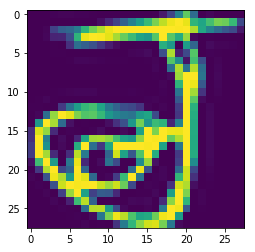

In [25]:
# looking at data; some fonts are strange
i = 42
print("It is:", "ABCDEFGHIJ"[y[i]])
plt.imshow(X[i]);

In [26]:
# splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [32]:
# creating a simple netural network
# in this case - just logistic regression
model = Sequential()

model.add(Flatten(input_shape=(resolution, resolution)))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
sequential_model_to_ascii_printout(model)

In [ ]:
 model.fit(X_train, Y_train,
           nb_epoch=10,
           batch_size=32,
           validation_data=(X_test, Y_test))